In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from skimage.io import imread
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumer/Training')

['notumor', 'pituitary', 'meningioma', 'glioma']

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumer/Testing')

['pituitary', 'notumor', 'meningioma', 'glioma']

# training set

In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumer/Training'

In [ ]:
X_train=[]
y_train=[]
categories=['pituitary','notumor','meningioma','glioma']
for i in categories:
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  print(i,':',len(images))
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print('loaded category:',i)

pituitary : 1349
loaded category: pituitary
notumor : 1574
loaded category: notumor
meningioma : 1319
loaded category: meningioma
glioma : 1287
loaded category: glioma


# test set

In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumer/Testing'

In [ ]:
X_test=[]
y_test=[]
categories=['pituitary','notumor','meningioma','glioma']
for i in categories:
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  print(i,':',len(images))
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
  print('loaded category:',i)

pituitary : 300
loaded category: pituitary
notumor : 405
loaded category: notumor
meningioma : 306
loaded category: meningioma
glioma : 300
loaded category: glioma


# model

In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
#X_train.shape
X_test.shape


(1311, 150, 150, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,3,input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(X_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
56/56 [==============================] - 6s 30ms/step - loss: 1.3796 - accuracy: 0.3880
Epoch 2/50
56/56 [==============================] - 1s 26ms/step - loss: 1.2210 - accuracy: 0.4243
Epoch 3/50
56/56 [==============================] - 1s 26ms/step - loss: 1.1366 - accuracy: 0.4286
Epoch 4/50
56/56 [==============================] - 1s 26ms/step - loss: 1.0800 - accuracy: 0.4395
Epoch 5/50
56/56 [==============================] - 1s 26ms/step - loss: 1.0544 - accuracy: 0.4480
Epoch 6/50
56/56 [==============================] - 1s 26ms/step - loss: 1.0249 - accuracy: 0.4424
Epoch 7/50
56/56 [==============================] - 1s 25ms/step - loss: 0.9988 - accuracy: 0.4482
Epoch 8/50
56/56 [==============================] - 2s 28ms/step - loss: 0.9737 - accuracy: 0.4603
Epoch 9/50
56/56 [==============================] - 2s 29ms/step - loss: 0.9570 - accuracy: 0.4476
Epoch 10/50
56/56 [==============================] - 2s 27ms/step - loss: 0.9389 - accuracy: 0.4916
Epoch 11/

In [ ]:
loss,acc=model.evaluate(X_test,y_test)
print('loss:',loss)
print('accuracy:',acc)

41/41 [==============================] - 1s 7ms/step - loss: 0.3923 - accuracy: 0.8749
loss: 0.39233845472335815
accuracy: 0.8749046325683594


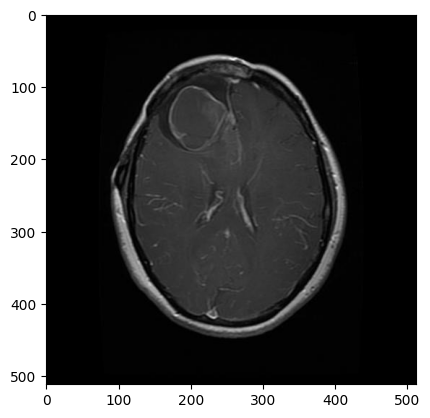

In [ ]:
img=imread('/content/drive/MyDrive/Brain_Tumer/Testing/glioma/Te-gl_0034.jpg')
plt.imshow(img)

In [ ]:
img=resize(img,(150,150,1))
img_array=np.array(img)
img_array.shape
# reshape img array to shape of x_train
img_array=img_array.reshape(1,150,150,1)
img_array.shape

(1, 150, 150, 1)

In [ ]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 99ms/step
[[2.4638190e-19 6.0153703e-18 9.3777524e-03 9.9062222e-01]]


In [ ]:
# take index of highest value in pred
ind=pred.argmax()
print(ind)

3


In [ ]:
print(categories[ind])

glioma
